<a href="https://colab.research.google.com/github/Mario-Canon-Ayala/TDO/blob/main/Redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Redes neuronales artificiales

El objetivo de esta práctica es implementar Perceptrones multicapa en Python, usando *scikit-learn*.

## Ejercicio 1

Escriba un código que implemente un Perceptron. La función debe tener 2 entradas binarias y devolver la salida del perceptron. Use la compuerta *AND*.

In [ ]:
# Import useful libraries
import pandas as pd     # to handle data frames
import numpy as np      # to manipulate matrices/vectors
import matplotlib.pyplot as plt     # to generate plots
import math

# to allow for plots in notebooks
%matplotlib inline

In [ ]:
# AND
def perceptron(x1,x2):
    v = x1 + x2 - 1.2
    if v < 0:
        return 0
    else:
        return 1

In [ ]:
X = [[0, 0],
     [0, 1],
     [1, 0],
     [1, 1]]

for row in X:
    y = perceptron(row[0], row[1])
    print(f'Input : {row} Output : {y}')

Input : [0, 0] Output : 0
Input : [0, 1] Output : 0
Input : [1, 0] Output : 0
Input : [1, 1] Output : 1


In [ ]:
# Segunda opción
import numpy as np

def perceptron2(Xmat):
    W = np.array([1, 1])
    V = Xmat @ W.T - 1.2
    Y = list(map(lambda x: 0 if x<0 else 1, V))
    return Y

print('Output', perceptron2(X))

## Ejercicio 2
Implemente la compuerta *XOR* utilizando dos entradas binarias.

In [ ]:
def neuron(Xmat, W, b):
    V = Xmat @ W.T + b
    return list(map(lambda x: 0 if x<0 else 1, V))

def MLP_XOR(Xmat):
    W1 = np.array([1, 1])
    b1 = -1.5
    Y1 = neuron(Xmat, W1, b1)
    W2 = np.array([1, 1])
    b2 = -0.5
    Y2 = neuron(Xmat, W2, b2)
    X3 = np.c_[Y1, Y2]    # use square brackets
    W3 = np.array([-2, 1])
    b3 = -0.5
    return neuron(X3, W3, b3)


print('Output ==>', MLP_XOR(X))

Output ==> [0, 1, 1, 0]


## Ejercicio 3

Modifique las funciones anteriores para que puedan utilizar funciones de activación ReLU y sigmoide en las neuronas y en las capas ocultas.

## Ejercicio 4
El siguiente tutorial explica cómo implementar MLPs utilizando scikit-learn. La tarea consiste en implementar un clasificador para identificar a los clientes en riesgo de incumplimiento de pagos con tarjeta de crédito. Después de completar el tutorial, se le pedirá que realice una tarea similar de manera independiente.


onjunto de datos

El poder del modelo está en su capacidad para predecir muestras que no fueron vistas durante el entrenamiento. Es decir, la capacidad del modelo para generalizar. Idealmente, deberíamos usar un conjunto de datos independiente para probar el modelo. Sin embargo, es bastante frecuente que dicho conjunto no esté disponible. Típicamente, simplemente dividimos aleatoriamente el conjunto de datos disponible en dos subconjuntos: entrenamiento y prueba.

Vamos a usar un conjunto de datos para modelar el riesgo de incumplimiento en pagos con tarjeta de crédito. El conjunto de datos se llama default y se puede descargar desde mi repositorio de GitHub siguiendo este enlace:
https://raw.githubusercontent.com/iaolier/7021DATSCI/main/data/default.csv
.

El archivo default.csv es un archivo de valores separados por comas (CSV). Existen varias funciones en Python que se pueden usar para leer este tipo de archivos. Nosotros utilizaremos read_csv, que viene con el paquete pandas de Python. pandas es un paquete muy robusto y extenso que se ha convertido en el estándar para la manipulación de datos en Python.

Descarga el archivo y guárdalo en una ubicación de fácil acceso (puede ser dentro del mismo directorio de trabajo). Como alternativa, puedes acceder directamente a su ubicación en Internet utilizando la función read_csv de pandas.

In [ ]:
import pandas as pd
dset = pd.read_csv('https://raw.githubusercontent.com/iaolier/7021DATSCI/main/data/default.csv')

In [ ]:
dset.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


A partir de lo anterior, cada fila corresponde a un cliente. El conjunto de datos default tiene 4 variables:

default: la variable de salida,

student: indica si es estudiante o no,

balance: saldo actual de la tarjeta de crédito, y

income: ingreso anual (en USD).

Por lo tanto, la tarea que nuestro primer modelo de red neuronal aprenderá es predecir el riesgo de incumplimiento (default) como función del resto de variables (entradas).

Además, observa que las variables default y student son categóricas (Sí/No). Aunque Python puede codificar variables categóricas con el tipo category, en realidad las columnas default y student aparecen como tipo object. Esto se debe a que, al crear el data frame, Python no pudo inferir correctamente su tipo.

In [ ]:
dset.dtypes

,0
default,object
student,object
balance,float64
income,float64


Para poder usar las variables categóricas en el modelado, debemos convertirlas en numéricas.  
Podemos decidir que "No" se codifique como 0, y "Yes" como 1.  

Para hacerlo, primero podemos convertirlas a categóricas y luego a numéricas.  

A continuación, usamos select_dtypes para seleccionar las columnas de tipo object.


In [ ]:
sel_cols = dset.select_dtypes(['object']).columns
sel_cols

Index(['default', 'student'], dtype='object')

Ahora las variables son numéricas

In [ ]:
dset[sel_cols] = dset[sel_cols].apply(lambda x: x.astype('category').cat.codes)
dset.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


Ahora debemos poner los datos en el formato correcto. Es decir, las entradas en una matriz y las salidas en un vector.  

Para ello, podemos usar la función *train_test_split*, que viene con el paquete *sklearn*.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dset.drop('default', axis=1),
                                                    dset['default'],
                                                    test_size=0.3, random_state=123)

In [ ]:
X_train.shape

(7000, 3)

Se recomienda escalar las columnas. Algunos algoritmos de aprendizaje automático requieren que lo hagamos, mientras que para otros es solo una recomendación. También existen algoritmos para los cuales el escalado de variables simplemente no es necesario.  

Aunque hay varias formas de hacerlo, aquí usaremos `StandardScaler`, que resta la media de cada columna y luego escala dividiendo entre su desviación estándar.


In [ ]:
from sklearn import preprocessing
mm_scaler = preprocessing.StandardScaler()  # creates a Transformer (set of preprocessing operations)
X_train = mm_scaler.fit_transform(X_train)  # estimates transformation parameters using the training set, and applies to them
X_test = mm_scaler.transform(X_test) # transforms test set using training set parameters.

Más información sobre el preprocesamiento de datos usando scikit-learn se puede encontrar aquí:  
https://scikit-learn.org/stable/modules/preprocessing.html  

* Puedes verificar los nuevos rangos de las columnas:


In [ ]:
from scipy import stats
stats.describe(X_train)

DescribeResult(nobs=np.int64(7000), minmax=(array([-0.64598061, -1.7186348 , -2.43829688]), array([1.54803408, 3.6048617 , 2.98182278])), mean=array([ 5.48132968e-17, -2.18238126e-17, -3.75572589e-17]), variance=array([1.00014288, 1.00014288, 1.00014288]), skewness=array([0.90205347, 0.24758687, 0.06338154]), kurtosis=array([-1.18629954, -0.35368553, -0.92826276]))

In [ ]:
stats.describe(X_test)

DescribeResult(nobs=np.int64(3000), minmax=(array([-0.64598061, -1.7186348 , -2.14166035]), array([1.54803408, 3.76146863, 2.85705065])), mean=array([-0.00020895,  0.0202558 ,  0.00078424]), variance=array([1.00014485, 0.99088956, 0.95470389]), skewness=array([0.90255646, 0.24284587, 0.09826331]), kurtosis=array([-1.18539184, -0.35851103, -0.82977307]))

#### Construyendo el primer modelo en *Scikit-Learn*  
Vamos a construir un modelo de perceptrón multicapa (MLP) con los datos de `default` utilizando la librería `sklearn`. Puedes encontrar documentación sobre la librería *Scikit-Learn* en https://scikit-learn.org/stable/index.html. Más detalles sobre cómo construir modelos de redes neuronales con *Scikit-Learn* se pueden encontrar aquí: https://scikit-learn.org/stable/modules/neural_networks_supervised.html.  

Primero, diseñemos la arquitectura de la red. La red requerirá tantas entradas como variables de entrada, y tantas salidas como variables de salida. Por lo tanto, nuestra primera red tendrá 3 entradas y 1 salida. La pregunta es si usamos neuronas ocultas (MLPs) o no (Perceptrón).  

* Vamos a construir nuestra primera arquitectura, que es un perceptrón multicapa (MLP) con una capa oculta. El modelo tendrá 3 entradas (una por cada variable de entrada) y 1 neurona de salida (que predice si el cliente incumple o no). La función de activación en la salida debe ser `sigmoid`, ya que la tarea es básicamente un problema de clasificación binaria. Una función `sigmoid` entregará la probabilidad de pertenecer a la clase positiva (que es *YES*, un "default"). Es menos claro cómo debe ser la capa oculta. Supongamos por ahora que estará formada por 5 neuronas, todas con la función de activación *ReLU*:


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_mdl = MLPClassifier(hidden_layer_sizes=(5,),random_state=42, max_iter=300)

Usamos la función `MLPClassifier` para crear la arquitectura del modelo. Por favor revisa el conjunto completo de parámetros, sus valores por defecto y, en general, cómo se utiliza siguiendo este enlace: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.  

El objeto `mlp_mdl` anterior es un objeto de Python que contiene un MLP con una capa oculta de 5 neuronas. Por defecto, `MLPClassifier` asume funciones *ReLU* en las capas ocultas y funciones *sigmoid* en la capa de salida. También asume que *ADAM* es el optimizador por defecto. Nuevamente, consulta la documentación para más detalles.  

Ahora es momento de entrenar el modelo. Casi todos los modelos de `sklearn` se entrenan usando la función `fit`, que recibe como entrada el conjunto de entrenamiento.


In [ ]:
mlp_mdl.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5,), max_iter=300, random_state=42)

Una vez entrenado el modelo, es útil analizar cómo evoluciona el error (loss) durante el proceso de aprendizaje.  
La variable `loss_curve_` de un objeto `MLPClassifier` guarda el valor de la función de pérdida en cada iteración o *epoch*.  
Al graficar esta curva podemos visualizar si el modelo está convergiendo correctamente, si necesita más iteraciones o si está presentando problemas como sobreajuste o estancamiento en un mínimo local.


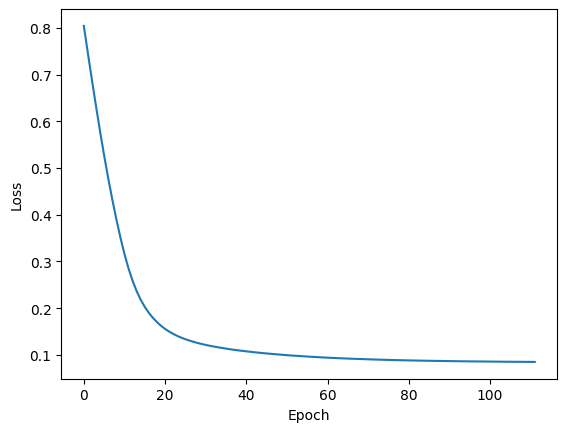

In [ ]:
# plot loss vs. number of epochs
import matplotlib.pyplot as plt
plt.plot(mlp_mdl.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Para predecir nuevas observaciones podemos usar la función estándar `predict` de sklearn, que predice la clase, o `predict_proba`, que predice la probabilidad de cada clase.  

* A continuación, se predice la clase de las primeras 200 observaciones del conjunto de prueba


In [ ]:
mlp_mdl.predict(X_test[0:200,])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0], dtype=int8)

También podemos predecir la probabilidad, en este caso, de las primeras 10 observaciones.

In [ ]:
mlp_mdl.predict_proba(X_test[0:10,])

array([[9.98566713e-01, 1.43328730e-03],
       [9.99999768e-01, 2.31760131e-07],
       [9.96776266e-01, 3.22373426e-03],
       [9.99999738e-01, 2.62284150e-07],
       [9.99186593e-01, 8.13406875e-04],
       [8.62065827e-01, 1.37934173e-01],
       [8.28305431e-01, 1.71694569e-01],
       [9.96939885e-01, 3.06011525e-03],
       [9.99688884e-01, 3.11116297e-04],
       [9.99946179e-01, 5.38210413e-05]])

El atributo `coefs_` contiene los valores de los pesos que fueron estimados durante el proceso de entrenamiento.  
`coefs_` es una lista de arreglos:


In [ ]:
[coef.shape for coef in mlp_mdl.coefs_]

[(3, 5), (5, 1)]

El código anterior confirma que tenemos una red con 3 entradas, 1 capa oculta con 5 neuronas y 1 neurona en la capa de salida.  

* También podemos extraer los pesos de las conexiones desde las entradas hacia la capa oculta de la siguiente manera:


In [ ]:
mlp_mdl.coefs_[0]

array([[-0.26336898, -0.20890703, -0.45579435,  1.01341756, -2.04843673],
       [-0.44032446, -1.28268782, -0.4431971 , -1.44858869, -0.88956438],
       [-0.70808277,  1.14527066,  0.41911739, -1.12811248, -0.32818682]])

Y para la salida de la capa oculta a la salida

In [ ]:
mlp_mdl.coefs_[1]

array([[-0.06017796],
       [-1.30020518],
       [-0.62488276],
       [-1.49331197],
       [-1.66264367]])

Ahora es momento de evaluar el modelo. Nos gustaría conocer aspectos como su curva ROC, el área bajo la curva ROC (AUC-ROC o simplemente AUC), etc.  
Más detalles sobre las métricas de clasificación se pueden encontrar aquí: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics.  

Como se vio en sesiones anteriores, la exactitud (accuracy) no siempre refleja la verdadera calidad del desempeño del modelo, particularmente en problemas con clases desbalanceadas.  
Por lo tanto, podemos realizar un análisis ROC.


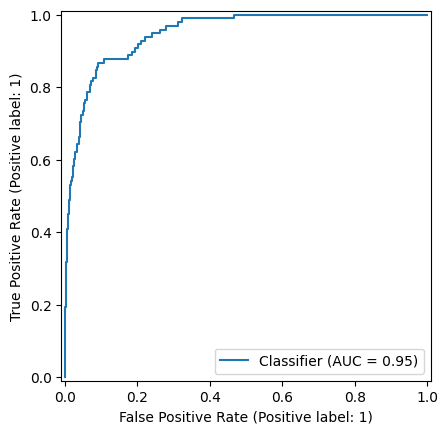

In [ ]:
from sklearn.metrics import RocCurveDisplay
y_pred_prob = mlp_mdl.predict_proba(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_prob[:,1])

Si queremos obtener el *AUC* (y no la gráfica ROC), simplemente podemos usar `roc_auc_score`:


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob[:,1])

np.float64(0.9492222112828591)

## Ejercicio 5

Repita el mismo análisis con:
* Una arquitectura de una capa oculta con 10 neuronas.
* Dos capas ocultas, una de 10 y una de 5.
Compare los resultados con los resultados anteriores.

### **Para entrega:**

## Ejercicio 6

Repite el análisis utilizando el conjunto de datos *Pima Indians* de la Sesión anterior, pero esta vez empleando un *MLP*.  
Considera varias arquitecturas de MLP variando el número de capas y el número de neuronas por capa.  
Discute el impacto de las diferentes arquitecturas en el desempeño de los modelos.


## Ejercicio 7

Realice un modelo de clasificación *MLP* para la base de datos *Iris* que fue utilizada en el taller anterior. Pruebe varias configuraciones y compare los resultados.

**Nota:** Los ejercicios 6 y 7 debe entregarlos en un informe escrito, preferiblemente, usando LaTeX, en los que compare los resultados con regresión logística y con MLP. El informe debe tener las siguientes secciones:
* Descripción de la base de datos.
* Ejercicio de clasificación.
* Comparación de modelos y arquitecturas.
* Discusión de resultados.
Puede utilizar las gráficas e indicadores que guste.